# Trabalho 3 - Operações Morfológicas

Faça um documento jupyter notebook que demonstre e explique o [exemplo](https://en.wikipedia.org/wiki/Top-hat_transform#Example) de segmentação dos discos claros usando a transformada top-hat.

-------
#### Bibliotecas

In [1]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Há dois tipos de transformada *Top-Hat*, uma é a transformada *White Top-Hat* e a outra é a *Black Top-Hat*, elas se diferem pelo tipo de operação de vizinhança que é utilizado. A *White Top-Hot* utilizada operação de abertura, quanto que a *Black Top-Hat* utiliza operação de fechamento.

A transformada *White Top-Hat* é definida da seguinte forma:

$$
T_{w}(f) = f - f \circ b
$$

onde $f$ é a imagem, $b$ é o elemento estruturante, e $\circ$ a operação de abertura.

Enquanto que a transformada *Black Top-Hat* é definida assim:

$$
T_{b}(f) = f \bullet b - f
$$

sendo $f$ e $b$ os mesmos definidos acima, e $\bullet$ a operação de fechamento.

A operação de abertura é dada pela da seguinte forma:

$$
f \circ b = (f \ominus \tilde{b}) \oplus b
$$

e a operação de fechamento por:

$$
f \bullet b = (f \oplus \tilde{b}) \ominus b
$$

onde os operadores $\ominus$ e $\oplus$ representam as operações de erosão e dilatação, respectivamente


In [2]:
img = cv.imread('../images/cosmos_original.jpg', cv.IMREAD_UNCHANGED)

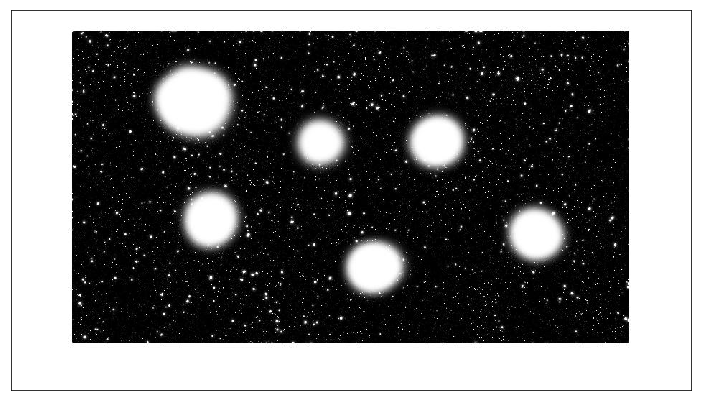

In [3]:
fig = plt.figure(figsize = (15, 7))

plt.imshow(img, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
disk = np.array([[5 >= (x - 3)**2 + (y - 3)**2 for y in range(0,7)] for x in range(0,7)]).astype('uint8')

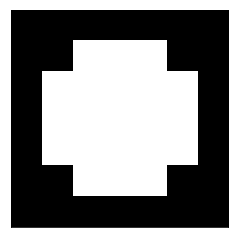

In [5]:
plt.imshow(disk, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

Iremos utilizar um elemento estruturante em forma de disco e com dimensões $(7, 7)$ pixels.

Abaixo definimos a função ```top_hat_abertura```, que recebe a imagem e o elemento estruturante, realiza as operações de erosão e dilatação, e retorna a imagem de entrada subtraida da imagem resultante da abertura (erosão e dilatação).

In [6]:
def top_hat_abertura(img, kernel):
    img_ero = cv.erode(img, disk)
    img_abe = cv.dilate(img_ero, disk)
    return (img - img_abe)

In [7]:
img_final = top_hat_abertura(img, disk)

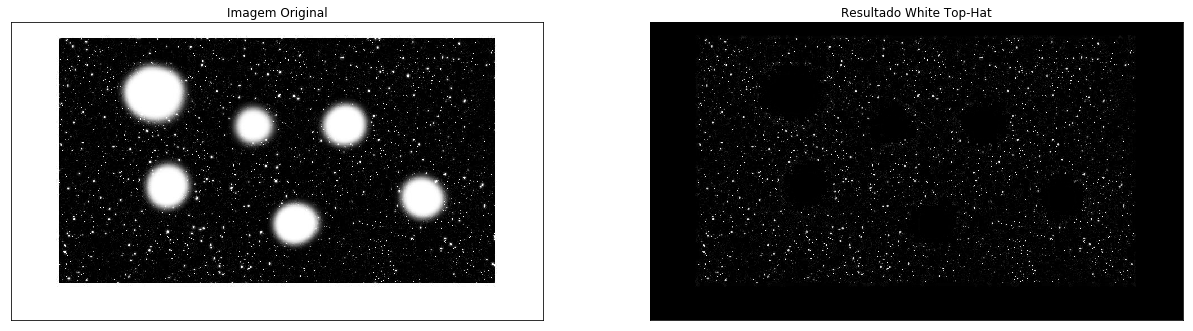

In [8]:
fig = plt.figure(figsize = (21, 15))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Imagem Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_final, cmap = 'gray')
plt.title('Resultado White Top-Hat')
plt.xticks([])
plt.yticks([])

plt.show()

Acima podemos ver o resultado do *White Top-Hat*. As bordas, porém, ficaram com valores zerados devido a subtração entre a imagem de entrada e a imagem resultante da abertura.

In [9]:
cv.imwrite('../images/img_final.jpg', img_final)

True